In [170]:
from speedml import Speedml
from tpot import TPOTClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

In [171]:
sml = Speedml('train.csv', 'test.csv', target = 'Survived', uid = 'PassengerId')
titanic = pd.read_csv('train.csv')

In [172]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Outliers Upper,"[SibSp, Fare]",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Ticket, Cabin]",(>10) categories. Use feature.labels.
Text Categorical,"[Embarked, Sex]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.


In [173]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


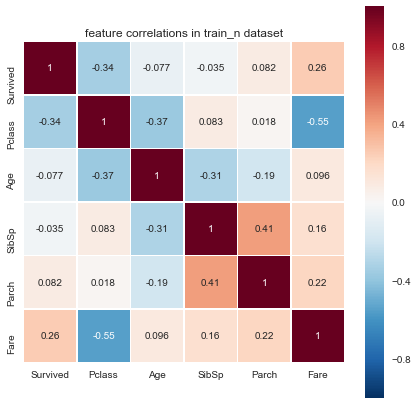

In [174]:
sml.plot.correlate()

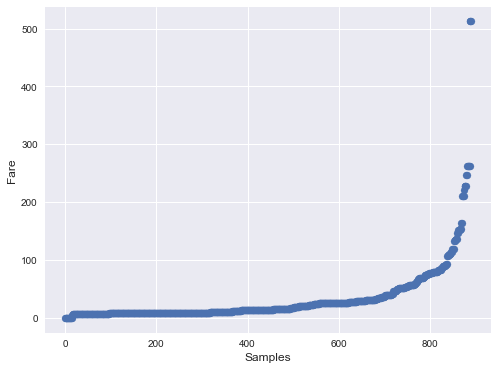

In [175]:
sml.plot.continuous('Fare')

'Fixed 9 or 1.01% upper outliers. '

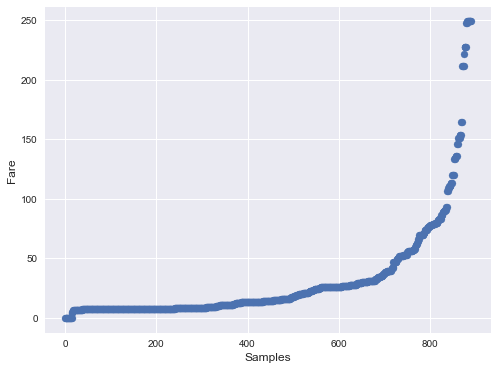

In [176]:
sml.feature.outliers('Fare', upper = 99)
sml.plot.continuous('Fare')

C:\Users\jleun\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\jleun\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


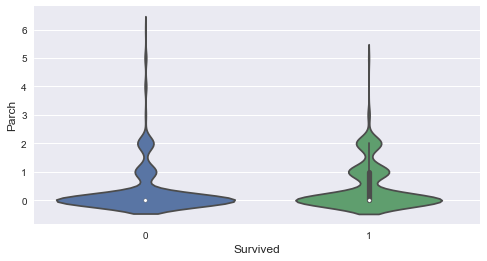

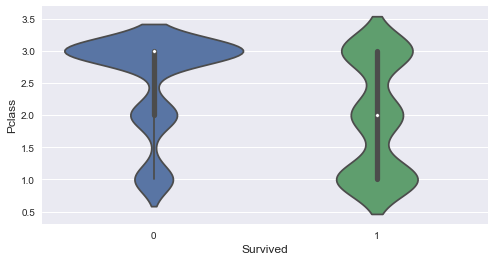

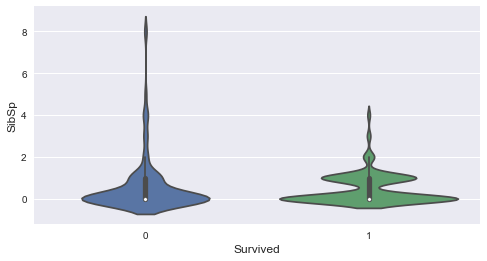

In [177]:
sml.plot.ordinal('Parch')
sml.plot.ordinal('Pclass')
sml.plot.ordinal('SibSp')

In [178]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Outliers Upper,"[SibSp, Fare]",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Ticket, Cabin]",(>10) categories. Use feature.labels.
Text Categorical,"[Embarked, Sex]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.


In [179]:
sml.feature.density(['Age', 'Ticket'])
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_density,Ticket_density
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,27,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,11,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,18,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,18,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,18,1


In [180]:
sml.feature.drop('Ticket')

'Dropped 1 features with 12 features available.'

In [181]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_density,Ticket_density
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,27,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,11,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,18,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,18,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,18,1


In [182]:
sml.feature.fillna(a='Cabin', new='Z')
sml.feature.extract(a='Cabin', regex = '([A-Z]){1}', new='Deck')
sml.feature.drop('Cabin')

'Filled 1014 null values across test and train datasets.'

'Dropped 1 features with 12 features available.'

In [183]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_density,Ticket_density,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,27,1,Z
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,11,1,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,18,1,Z
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,18,2,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,18,1,Z


In [184]:
sml.feature.mapping('Sex', {'male' : 0, 'female' : 1})

In [185]:
sml.feature.impute()

'Imputed 179 empty values to 0.'

In [186]:
sml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
Age               891 non-null float64
Age_density       891 non-null int64
Deck              891 non-null object
Embarked          891 non-null object
Fare              891 non-null float64
Name              891 non-null object
Parch             891 non-null int64
Pclass            891 non-null int64
Sex               891 non-null int64
SibSp             891 non-null int64
Survived          891 non-null int64
Ticket_density    891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 90.5+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
Age               418 non-null float64
Age_density       418 non-null int64
Deck              418 non-null object
Embarked          418 non-null object
Fare              418 non-null float64
Name              418 non-null object
Parch 

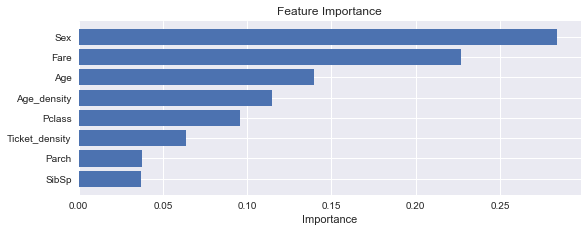

In [187]:
sml.plot.importance()

In [188]:
sml.train.head()

,Age,Age_density,Deck,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket_density
0,22.0,27,Z,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0,1
1,38.0,11,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1,1
2,26.0,18,Z,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1,1
3,35.0,18,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1,2
4,35.0,18,Z,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0,1


In [189]:
sml.feature.extract(new='Title', a='Name', regex=' ([A-Za-z]+)\.')
sml.plot.crosstab('Title', 'Sex')

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [190]:
sml.feature.replace(a='Title', match=['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], new='Rare')
sml.feature.replace('Title', 'Mlle', 'Miss')
sml.feature.replace('Title', 'Ms', 'Miss')
sml.feature.replace('Title', 'Mme', 'Mrs')
sml.feature.drop('Name')

'Replaced matching list of strings across train and test datasets.'

'Replaced 2 matching values across train and test datasets.'

'Replaced 2 matching values across train and test datasets.'

'Replaced 1 matching values across train and test datasets.'

'Dropped 1 features with 12 features available.'

In [191]:
sml.train.head()

,Age,Age_density,Deck,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Ticket_density,Title
0,22.0,27,Z,S,7.2500,0,3,0,1,0,1,Mr
1,38.0,11,C,C,71.2833,0,1,1,1,1,1,Mrs
2,26.0,18,Z,S,7.9250,0,3,1,0,1,1,Miss
3,35.0,18,C,S,53.1000,0,1,1,1,1,2,Mrs
4,35.0,18,Z,S,8.0500,0,3,0,0,0,1,Mr


In [192]:
sml.feature.labels(['Title', 'Deck', 'Embarked'])
sml.train.head()

,Age,Age_density,Deck,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Ticket_density,Title
0,22.0,27,8,2,7.2500,0,3,0,1,0,1,2
1,38.0,11,2,0,71.2833,0,1,1,1,1,1,3
2,26.0,18,8,2,7.9250,0,3,1,0,1,1,1
3,35.0,18,2,2,53.1000,0,1,1,1,1,2,3
4,35.0,18,8,2,8.0500,0,3,0,0,0,1,2


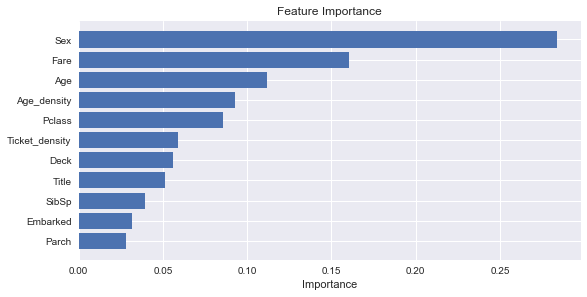

In [193]:
sml.plot.importance()

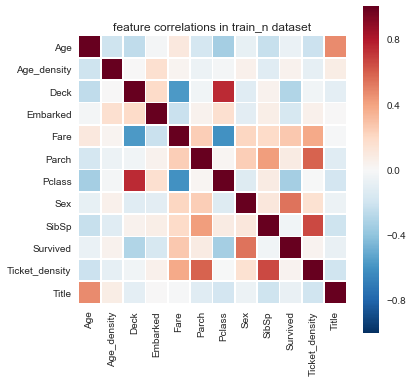

In [194]:
sml.plot.correlate()

<Figure size 432x288 with 0 Axes>

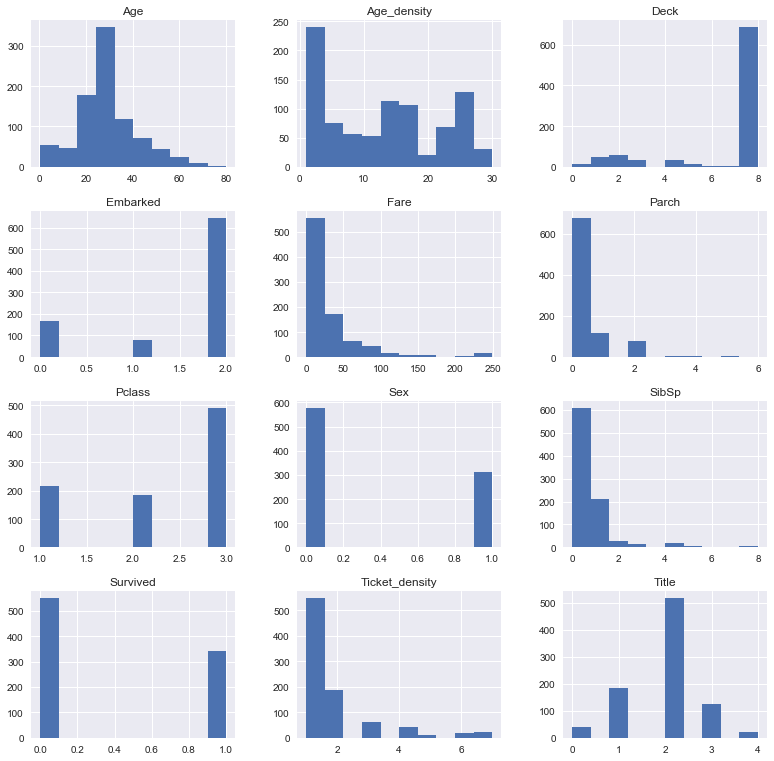

In [195]:
sml.plot.distribute()

In [196]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Outliers Upper,"[Fare, SibSp]",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 12) | test (418, 11)",
Numerical High-cardinality,"[Age, Age_density, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Deck, Embarked, Parch, Pclass, Sex, SibSp, Su...",Use plot.ordinal.
Target Analysis (Survived),Model ready.,Use classification models.


In [197]:
sml.train.head()

,Age,Age_density,Deck,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Ticket_density,Title
0,22.0,27,8,2,7.2500,0,3,0,1,0,1,2
1,38.0,11,2,0,71.2833,0,1,1,1,1,1,3
2,26.0,18,8,2,7.9250,0,3,1,0,1,1,1
3,35.0,18,2,2,53.1000,0,1,1,1,1,2,3
4,35.0,18,8,2,8.0500,0,3,0,0,0,1,2


In [198]:
sml.model.data()

'train_X: (891, 11) train_y: (891,) test_X: (418, 11)'

In [199]:
select_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
fixed_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\utils\

,rank,params
1,1,"{'max_depth': 3, 'min_child_weight': 3}"
2,2,"{'max_depth': 3, 'min_child_weight': 5}"
8,2,"{'max_depth': 7, 'min_child_weight': 5}"
6,4,"{'max_depth': 7, 'min_child_weight': 1}"
3,5,"{'max_depth': 5, 'min_child_weight': 1}"
4,5,"{'max_depth': 5, 'min_child_weight': 3}"
5,7,"{'max_depth': 5, 'min_child_weight': 5}"
7,8,"{'max_depth': 7, 'min_child_weight': 3}"
0,9,"{'max_depth': 3, 'min_child_weight': 1}"


In [200]:
select_params = {'learning_rate': [0.3, 0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
fixed_params = {'max_depth': 3, 'min_child_weight': 1, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\utils\

,rank,params
5,1,"{'learning_rate': 0.1, 'subsample': 0.9}"
2,2,"{'learning_rate': 0.3, 'subsample': 0.9}"
3,3,"{'learning_rate': 0.1, 'subsample': 0.7}"
0,4,"{'learning_rate': 0.3, 'subsample': 0.7}"
1,5,"{'learning_rate': 0.3, 'subsample': 0.8}"
4,6,"{'learning_rate': 0.1, 'subsample': 0.8}"
6,7,"{'learning_rate': 0.01, 'subsample': 0.7}"
8,7,"{'learning_rate': 0.01, 'subsample': 0.9}"
7,9,"{'learning_rate': 0.01, 'subsample': 0.8}"


In [201]:
tuned_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'max_depth': 3, 'min_child_weight': 1,
                'seed':0, 'colsample_bytree': 0.8, 
                'objective': 'binary:logistic'}
sml.xgb.cv(tuned_params)

C:\Users\jleun\Anaconda3\lib\site-packages\speedml\xgb.py:54: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  self.error = self.cv_results.get_value(len(self.cv_results) - 1, 'test-error-mean')


In [202]:
sml.xgb.cv_results.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
31,0.171728,0.013701,0.139173,0.008542
32,0.173981,0.013045,0.138893,0.009486
33,0.173981,0.012551,0.137768,0.007212
34,0.173981,0.010939,0.136927,0.007953
35,0.170617,0.011849,0.134121,0.009185


In [203]:
tuned_params['n_estimators'] = sml.xgb.cv_results.shape[0] - 1
sml.xgb.params(tuned_params)

C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

,Classifier,Accuracy
0,RandomForestClassifier,0.834444
0,GradientBoostingClassifier,0.831111
0,XGBClassifier,0.823333
0,AdaBoostClassifier,0.815556
0,DecisionTreeClassifier,0.792222
0,LogisticRegression,0.785556
0,GaussianNB,0.780000
0,SVC,0.713333
0,KNeighborsClassifier,0.703333


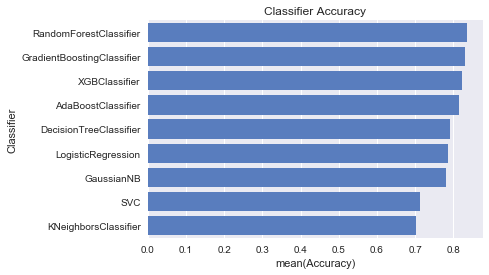

In [204]:
sml.xgb.classifier()
sml.model.evaluate()
sml.plot.model_ranks()
sml.model.ranks()

C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


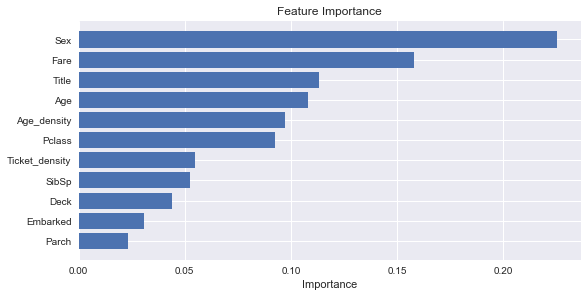

C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 79.480000%


C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.005, n=11, Accuracy: 79.48%


C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.038, n=10, Accuracy: 79.85%


C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.051, n=9, Accuracy: 77.99%


C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.066, n=8, Accuracy: 77.24%


C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.068, n=7, Accuracy: 77.24%


C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.071, n=6, Accuracy: 76.12%


C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.075, n=5, Accuracy: 76.12%


C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.079, n=4, Accuracy: 68.28%


C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.112, n=3, Accuracy: 69.03%


C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.161, n=2, Accuracy: 69.40%


C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.274, n=1, Accuracy: 69.40%


In [206]:
sml.xgb.fit()
sml.xgb.predict()
sml.plot.importance()
sml.xgb.feature_selection()

In [207]:
sml.xgb.sample_accuracy()

C:\Users\jleun\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'Accuracy = 86.42%. Found 770 correct of 891 total labels'

In [210]:
sml.save_results(
    columns={ 'PassengerId': sml.uid,
             'Survived': sml.xgb.predictions }, 
    file_path='titanic-speedml-{}.csv'.format(sml.slug()))
sml.slug()

'Results saved.'

'e17.06-m82.33-s86.42-f79.48'